# Lab 1 - SQL, Sakila EDA 
## Task 0

#### Data Ingestion (sqlite to duckdb)

In [1]:
# This cell loads the sakila database into duckdb.

# --- Liabreries ---
import duckdb                      # helps to create a duckdb database
from pathlib import Path           # helps work with file & folder paths easily
import matplotlib.pyplot as plt    # use for creating simple graphs & plots

# Path where duckdb database will be created
duckdb_path = "data/sakila.duckdb"

# Delete existing duckdb file if it exists to start fresh
Path(duckdb_path).unlink(missing_ok=True)

# Connect to duckdb & run the sakila load script
with duckdb.connect(duckdb_path) as conn, open("sql/load_sakila.sql") as ingest_script:
    conn.sql(ingest_script.read())

    # Show database schema (list of tables & columns)
    description = conn.sql("DESC;").df()
    # Load the entire film table into a pandas dataframe
    films = conn.sql("FROM film;").df()

# Show the first 3-rows to verify the data was loaded correctly
films.head(3)

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,<NA>,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2021-03-06 15:52:00
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,<NA>,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2021-03-06 15:52:00
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,<NA>,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes",2021-03-06 15:52:00


## Task  1 -     (EDA)Exploratory Data Analysis
- Using duckdb + pandas
- Q: a-f

In [2]:
import duckdb
import pandas as pd

# Connect to the existing duckdb database
conn = duckdb.connect("data/sakila.duckdb")

#### a)   Which movies are longer than 3hours (180 min)?
- Show:  title & length

In [3]:
# Select movies longer than 180 min
long_movies = conn.sql(""" 
    SELECT title, length
    FROM film
    WHERE length > 180
    ORDER BY length DESC
""").df()

# Show result
long_movies

,title,length
0,WORST BANGER,185
1,CHICAGO NORTH,185
2,CONTROL ANTHEM,185
3,DARN FORRESTER,185
4,SWEET BROTHERHOOD,185
5,GANGS PRIDE,185
6,HOME PITY,185
7,SOLDIERS EVOLUTION,185
8,POND SEATTLE,185
9,MUSCLE BRIGHT,185


#### b) Movies with the word "love" in the title

In [4]:
# Find movies that contain 'love' in the title
love_movies = conn.sql(""" 
    SELECT title, rating, length, description
    FROM film
    WHERE LOWER(title) LIKE '%love%'
""").df()

# Show result
love_movies

,title,rating,length,description
0,GRAFFITI LOVE,PG,117,A Unbelieveable Epistle of a Sumo Wrestler And...
1,IDAHO LOVE,PG-13,172,A Fast-Paced Drama of a Student And a Crocodil...
2,IDENTITY LOVER,PG-13,119,A Boring Tale of a Composer And a Mad Cow who ...
3,INDIAN LOVE,NC-17,135,A Insightful Saga of a Mad Scientist And a Mad...
4,LAWRENCE LOVE,NC-17,175,A Fanciful Yarn of a Database Administrator An...
5,LOVE SUICIDES,R,181,A Brilliant Panorama of a Hunter And a Explore...
6,LOVELY JINGLE,PG,65,A Fanciful Yarn of a Crocodile And a Forensic ...
7,LOVER TRUMAN,G,75,A Emotional Yarn of a Robot And a Boy who must...
8,LOVERBOY ATTACKS,PG-13,162,A Boring Story of a Car And a Butler who must ...
9,STRANGELOVE DESIRE,NC-17,103,A Awe-Inspiring Panorama of a Lumberjack And a...


#### c) Movies length statistics
We calculate:
- shortest
- average
- median
- longest

In [5]:
length_stats = conn.sql(""" 
    SELECT
        MIN(length) AS shortest,
        AVG(length) AS average,
        MEDIAN(length) AS median,
        MAX(length) AS longest
    FROM film
""").df()

# Show statistics
length_stats

,shortest,average,median,longest
0,46,115.272,114.0,185


#### d) 10 most expensive movies to rent per day

In [6]:
# Rental cost per day = rental_rate / rental_duration

expensive_movies = conn.sql(""" 
    SELECT
        title,
        rental_rate,
        rental_duration,
        ROUND(rental_rate / rental_duration, 2) AS cost_per_day
    FROM film
    ORDER BY cost_per_day DESC
    LIMIT 10
""").df()

# Show result
expensive_movies 

,title,rental_rate,rental_duration,cost_per_day
0,AMERICAN CIRCUS,4.99,3,1.66
1,BACKLASH UNDEFEATED,4.99,3,1.66
2,BILKO ANONYMOUS,4.99,3,1.66
3,BEAST HUNCHBACK,4.99,3,1.66
4,CARIBBEAN LIBERTY,4.99,3,1.66
5,AUTUMN CROW,4.99,3,1.66
6,CASPER DRAGONFLY,4.99,3,1.66
7,ACE GOLDFINGER,4.99,3,1.66
8,BEHAVIOR RUNAWAY,4.99,3,1.66
9,CASUALTIES ENCINO,4.99,3,1.66


#### e) Top 10 actors who played in the most movies

In [7]:
# Count number of movies per actor
top_actors = conn.sql(""" 
    SELECT
        a.first_name || '' || a.last_name AS actor_name,
        COUNT(fa.film_id) AS movie_count
    FROM actor a
    JOIN film_actor fa ON a.actor_id = fa.actor_id
    GROUP BY actor_name
    ORDER BY movie_count DESC
    LIMIT 10
""").df()

# Show result
top_actors 

,actor_name,movie_count
0,SUSANDAVIS,54
1,GINADEGENERES,42
2,WALTERTORN,41
3,MARYKEITEL,40
4,MATTHEWCARREY,39
5,SANDRAKILMER,37
6,SCARLETTDAMON,36
7,ANGELAWITHERSPOON,35
8,GROUCHODUNST,35
9,VALBOLGER,35


#### f) My own 3 simple questions


Q_1 : Which film categories have most movies?

In [8]:
category_movies = conn.sql(""" 
    SELECT
        c.name AS category,
        COUNT(*) AS movies
    FROM category c
    JOIN film_category fc ON c.category_id = fc.category_id
    GROUP BY category
    ORDER BY movies DESC
""").df()

# Show result
category_movies 

,category,movies
0,Sports,74
1,Foreign,73
2,Family,69
3,Documentary,68
4,Animation,66
5,Action,64
6,New,63
7,Drama,62
8,Sci-Fi,61
9,Games,61


Q_2: Average rental rate per film category

In [9]:
# Select average renta rate per category

avg_rental_rate = conn.sql(""" 
    SELECT
        c.name AS category,
        ROUND(AVG(f.rental_rate), 2) AS avg_rental_rate   
    FROM category c
    JOIN film_category fc ON c.category_id = fc.category_id
    JOIN film f ON fc.film_id = f.film_id
    GROUP BY c.name
    ORDER BY avg_rental_rate DESC
""").df()

# Show result 
avg_rental_rate

,category,avg_rental_rate
0,Games,3.25
1,Travel,3.24
2,Sci-Fi,3.22
3,Comedy,3.16
4,Sports,3.13
5,New,3.12
6,Foreign,3.10
7,Horror,3.03
8,Drama,3.02
9,Music,2.95


Q_3: Top 5 customers by number of rentals

In [10]:
# Select top 5 customers  by total rentals
top_customers = conn.sql(""" 
    SELECT
        c.first_name || '' || c.last_name AS customer_name,
        COUNT(r.rental_id) AS total_rentals
    FROM customer c
    JOIN rental r ON c.customer_id = r.customer_id
    GROUP BY customer_name
    ORDER BY total_rentals DESC
    LIMIT 5
""").df()

# Show result
top_customers

,customer_name,total_rentals
0,ELEANORHUNT,46
1,KARLSEAL,45
2,CLARASHAW,42
3,MARCIADEAN,42
4,TAMMYSANDERS,41


## Task 2 (Graphs) - Visualizations

#### a) Top 5 Customers by total spend

In [11]:
# Query total spend per customer

top_customers_spend = conn.sql(""" 
    SELECT
        c.first_name || '' || c.last_name AS customer_name,
        ROUND(SUM(p.amount), 2) AS total_spent
    FROM customer c
    JOIN payment p ON c.customer_id = p.customer_id
    GROUP BY customer_name
    ORDER BY total_spent DESC
    LIMIT 5
""").df()

# Show result
top_customers_spend 

,customer_name,total_spent
0,KARLSEAL,221.55
1,ELEANORHUNT,216.54
2,CLARASHAW,195.58
3,MARIONSNYDER,194.61
4,RHONDAKENNEDY,194.61


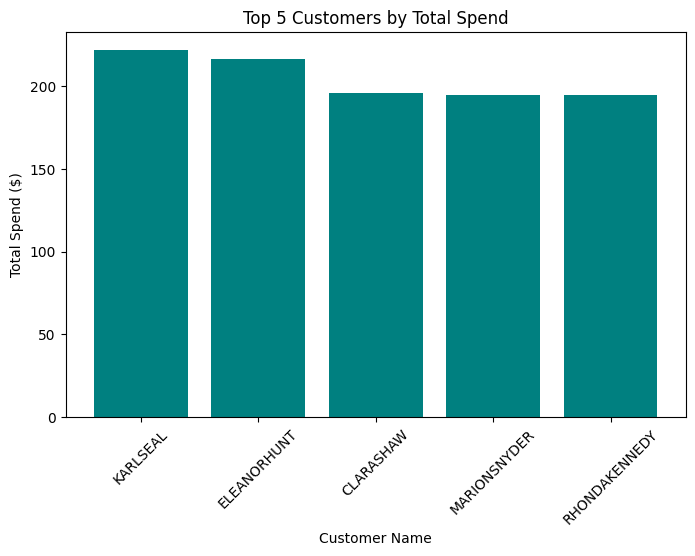

In [15]:
# Create a bar chart for the top 5 customers by total spend

plt.figure(figsize=(8,5))
plt.bar(top_customers_spend['customer_name'], top_customers_spend['total_spent'], color='teal')
plt.title('Top 5 Customers by Total Spend')
plt.xlabel('Customer Name')
plt.ylabel('Total Spend ($)')
plt.xticks(rotation=45)
plt.show()

#### b) Total revenue per film category

In [16]:
# Query total revenue per film category

category_revenue = conn.sql(""" 
    SELECT
        cat.name AS category,
        ROUND(SUM(p.amount), 2) AS total_revenue
    FROM category cat
    JOIN film_category fc ON cat.category_id = fc.category_id
    JOIN film f ON fc.film_id = f.film_id
    JOIN inventory i ON f.film_id = i.film_id
    JOIN rental r ON i.inventory_id = r.inventory_id
    JOIN payment p ON r.rental_id = p.rental_id
    GROUP BY cat.name
    ORDER BY total_revenue DESC
""").df()

# Show result
category_revenue 

,category,total_revenue
0,Sports,5314.21
1,Sci-Fi,4756.98
2,Animation,4656.30
3,Drama,4587.39
4,Comedy,4383.58
5,Action,4375.85
6,New,4351.62
7,Games,4281.33
8,Foreign,4270.67
9,Family,4226.07


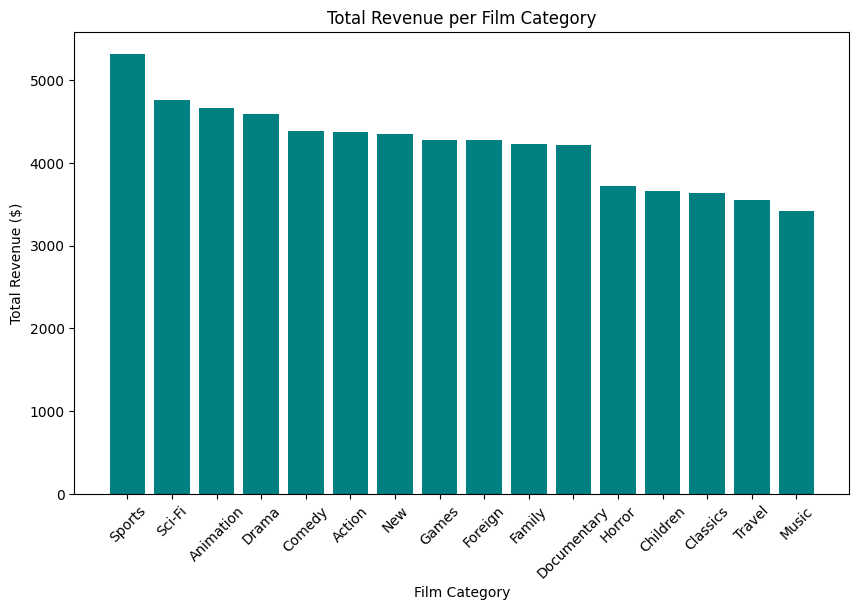

In [17]:
# Create a bar chart for total revenue per film category

plt.figure(figsize=(10,6))
plt.bar(category_revenue['category'], category_revenue['total_revenue'], color='teal')
plt.title('Total Revenue per Film Category')
plt.xlabel('Film Category')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.show()